In [35]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('./data/netflix_titles.csv')

# Select: Allow users to select data points interactively.

## Notes
- Type: Scatter plot.
- Justification: Users can click on data points to select them.
- Interactions:  on hover on data points , gives you the label , with movie or tv show name.

<IPython.core.display.Javascript object>


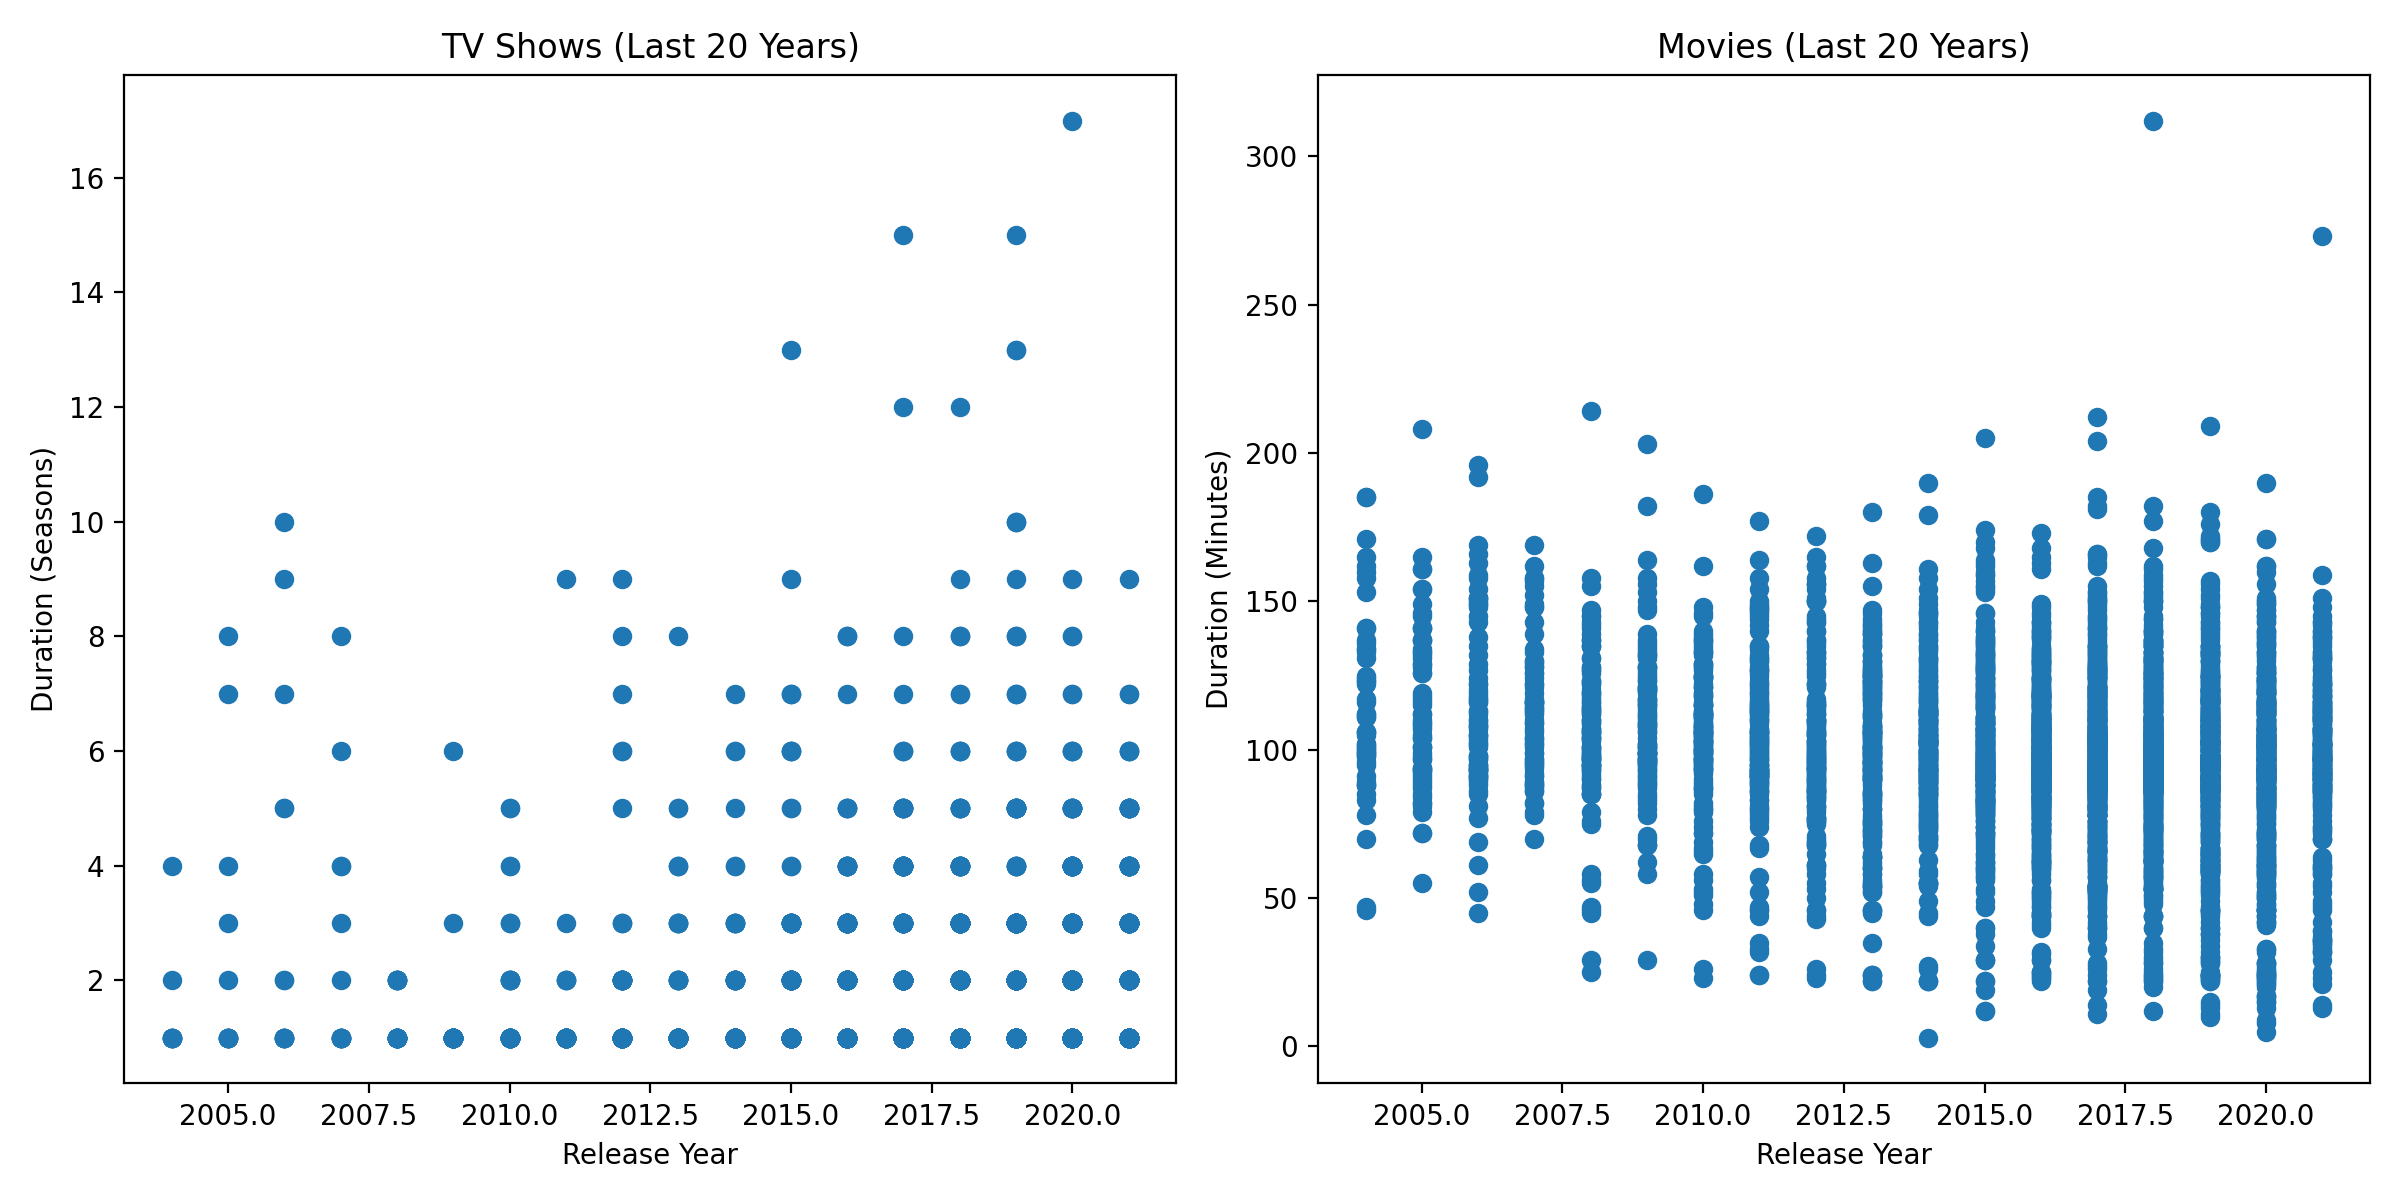

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib notebook

# Assuming 'df' is your DataFrame containing the data

# Function to extract numeric value from duration
def extract_duration(duration):
    if isinstance(duration, float):
        return duration
    else:
        try:
            return int(duration.split()[0])
        except ValueError:
            return None
    
# Convert duration to numeric
df['duration_numeric'] = df['duration'].apply(extract_duration)

# Separate TV shows and movies
current_year = pd.Timestamp.now().year
last_20_years_df = df[df['release_year'] >= current_year - 20]

# Separate TV shows and movies
tv_shows_df = last_20_years_df[last_20_years_df['type'] == 'TV Show']
movies_df = last_20_years_df[last_20_years_df['type'] == 'Movie']

# Plotting TV shows
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# TV Shows Plot
tv_scatter = axs[0].scatter(tv_shows_df['release_year'], tv_shows_df['duration_numeric'])
axs[0].set_xlabel('Release Year')
axs[0].set_ylabel('Duration (Seasons)')
axs[0].set_title('TV Shows (Last 20 Years)')

# Movies Plot
movies_scatter = axs[1].scatter(movies_df['release_year'], movies_df['duration_numeric'])
axs[1].set_xlabel('Release Year')
axs[1].set_ylabel('Duration (Minutes)')
axs[1].set_title('Movies (Last 20 Years)')

plt.tight_layout()

# Add hover functionality
def hover(event):
    for scatter, df_type, ax in [(tv_scatter, tv_shows_df, axs[0]), (movies_scatter, movies_df, axs[1])]:
        contains, _ = scatter.contains(event)
        if not contains:
            continue

        index = scatter.contains(event)[1]["ind"][0]
        title = df_type.iloc[index]['title']
        ax.annotate(f"Title: {title}",
                    xy=(scatter.get_offsets()[index][0], scatter.get_offsets()[index][1]),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=10, color='black',
                    arrowprops=dict(arrowstyle='-', color='black'))
        plt.draw()

fig.canvas.mpl_connect('motion_notify_event', hover)

plt.show()

# Explore: To Analyise where the movies have released heavily .
## Analysis
- Type: Scatterplot
- Labels: 
 - x-axis: timeline of movies released
 - y - axis: countries in which the movies released
- Justification: Users can zoom in/out and pan to explore specific regions of the plot.
- Customisation :
- Download : Download as img , 
- hover Function : Hover on points to see the label , 
- Box Select :  To filter the plot size , 
- Lasso Effect : Draw to fouces on sample size, 
- Zoom : Zoom In and Zoom out, 
- AutoScale: To see and  cover entire dataset 

In [37]:
import plotly.express as px

# fig = px.scatter(df, x='release_year', y='country')
# fig.update_layout(title='Explore Data', xaxis_title='Release Year', yaxis_title='Country release' )
# fig.show()

fig = px.scatter(df, x='release_year', y='country', title='Explore Data',
                 labels={'release_year': 'Release Year', 'country': 'Country release'}, hover_data={'title': False},
                 hover_name='title')

# Update layout
fig.update_layout(title='Explore Data', xaxis_title='Release Year', yaxis_title='Country release')

# Show plot
fig.show()

# Hover on the plot to get the options to zoom

# Reconfigure: Allow users to change the Director.
##
- Type: Dropdown menu to select different directors.
- Justification:to see the time line of movies released and number of movies directed by selected directed.
- Customisation: 
 - Dropdown: Lets the user to select the director 
 - Bar Graph : no of movies director
 - Line Graph : Timeline of the movies directed
 - Arrow Keys: Left Key to navigate previous state of plot , right key to naviagte to next state
 - Box Select : To Select specific regions and zoom in

In [38]:
from ipywidgets import interact, Dropdown

# Create a list of unique directors
directors = df['director'].unique()

# Set the default director
default_director = "Spike Lee"

def plot_movies_by_director(selected_director=default_director):
    if selected_director is None:
        return

    movies = df[df['director'] == selected_director][['title', 'release_year']]
    
    # Plotting the count of movies by director
    plt.figure(figsize=(16, 8))
    ax1 = plt.subplot(2, 1, 1)
    movies_count = len(movies)
    ax1.bar(selected_director, movies_count, color='skyblue')
    ax1.set_ylabel('Number of Movies')
    ax1.set_title(f"Number of Movies Directed by {selected_director}")

    # Plotting the release years of movies by director
    ax2 = plt.subplot(2, 1, 2)
    ax2.plot(movies['title'], movies['release_year'], marker='o', color='orange', linestyle='-')
    ax2.set_ylabel('Release Year')
    ax2.set_xlabel('Movie Title')
    ax2.set_title(f"Release Years of Movies Directed by {selected_director}")
    ax2.grid(True)
    ax2.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

# Create interactive dropdown menu
interact(plot_movies_by_director, selected_director=Dropdown(options=directors, value=default_director))

interactive(children=(Dropdown(description='selected_director', index=81, options=('Kirsten Johnson', nan, 'Ju…

<function __main__.plot_movies_by_director(selected_director='Spike Lee')>

# Encode: Use different visual properties (color, size, shape) to encode additional dimensions.
## 
- test world cloud in windows
- Type: Scatter plot with color/size encoding.
- Justification: Color/size can represent an additional categorical/numerical variable.

In [39]:
from wordcloud import WordCloud
# Filter out NaN values and split directors by comm

# Path to a TrueType font file
font_path = "./data/Lato-Regular.ttf"

# Directors data
directors = df['director'].dropna().str.split(', ')

# Calculate the count of movies directed by each director
director_counts = directors.explode().value_counts().to_dict()

# Generate the word cloud with count in the label
text = ' '.join([f"{director} ({director_counts[director]})" for director_list in directors for director in director_list])
wordcloud = WordCloud(width=800, height=400, background_color='white', font_path=font_path).generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

ValueError: Only supported for TrueType fonts

# Encode: Use different visual properties (color, size, shape) to encode additional dimensions.
## 
- Analysis: To see the directors who have directored more than the threshold , for tv shows more that 2 and for movies more than 10 movies
- Type: Bar plot with color/size encoding.
- Customisation: 
 - Dropdown: Lets the user to select the director 
 - Bar Graph : no of movies director
 - Line Graph : Timeline of the movies directed
 - Arrow Keys: Left Key to navigate previous state of plot , right key to naviagte to next state
 - Box Select : To Select specific regions and zoom in
 - color : color range shows the frequency of the movies directed
 - on hover : on hover on bars give you the list of projects they have directed

In [41]:


# Split directors and count the occurrences
tv_directors = df[df['type'] == 'TV Show']
movie_directors = df[df['type'] == 'Movie']



# Calculate the count of movies directed by each director for TV shows and movies
tv_director_counts = tv_directors.explode('director').groupby('director').size()
movie_director_counts = movie_directors.explode('director').groupby('director').size()

# Filter directors with at least 2 occurrences for TV Shows and 10 occurrences for Movies
filtered_tv_directors = tv_director_counts[tv_director_counts >= 2]
filtered_movie_directors = movie_director_counts[movie_director_counts >= 10]

# Create a function to get movies directed by a director
def get_movies(director):
    return df[(df['director'] == director) & (df['type'] == 'Movie')]['title'].tolist()

# Create dataframes for the plots
tv_df = pd.DataFrame({'director': filtered_tv_directors.index, 'count': filtered_tv_directors.values})
tv_df['movies'] = tv_df['director'].apply(get_movies)

movie_df = pd.DataFrame({'director': filtered_movie_directors.index, 'count': filtered_movie_directors.values})
movie_df['movies'] = movie_df['director'].apply(get_movies)

# Create Plotly figures
fig_tv = px.bar(tv_df, x='director', y='count', color='count',
                labels={'director': 'Director', 'count': 'Frequency'},
                title='Frequency of Directors in TV Shows (>= 2 occurrences)',
                hover_data={'director': False, 'count': False, 'movies': True})
fig_tv.update_xaxes(tickangle=45)

fig_movie = px.bar(movie_df, x='director', y='count', color='count',
                   labels={'director': 'Director', 'count': 'Frequency'},
                   title='Frequency of Directors in Movies (>= 10 occurrences)',
                   hover_data={'director': False, 'count': False, 'movies': True})
fig_movie.update_xaxes(tickangle=45)

# Show the plots
fig_tv.show()
fig_movie.show()

# Abstract: Use aggregation or summarization to show a higher-level view of the data.
##
- Type: Pie chart.
- Analysis: To summarise the movies coming out of each country , we see that tv shows are not as popular as movies.
- Customisation:
    - Download : Download as img , 
    - hover Function : Hover on points to see the label , 
    - Box Select :  To filter the plot size , 
    - Lasso Effect : Draw to fouces on sample size, 
    - Zoom : Zoom In and Zoom out, 
    - AutoScale: To see and  cover entire dataset 
    

<IPython.core.display.Javascript object>


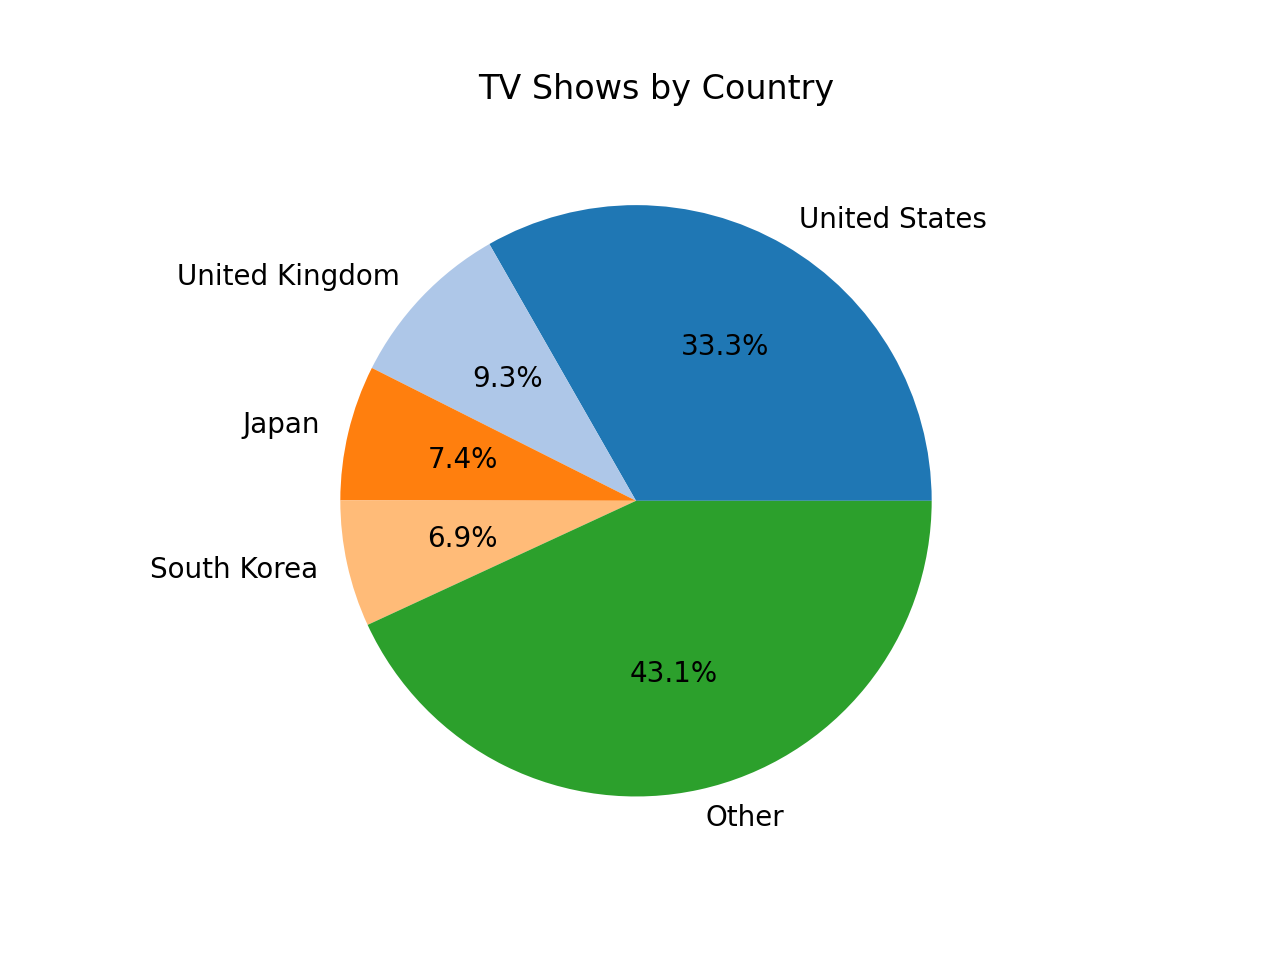

<IPython.core.display.Javascript object>


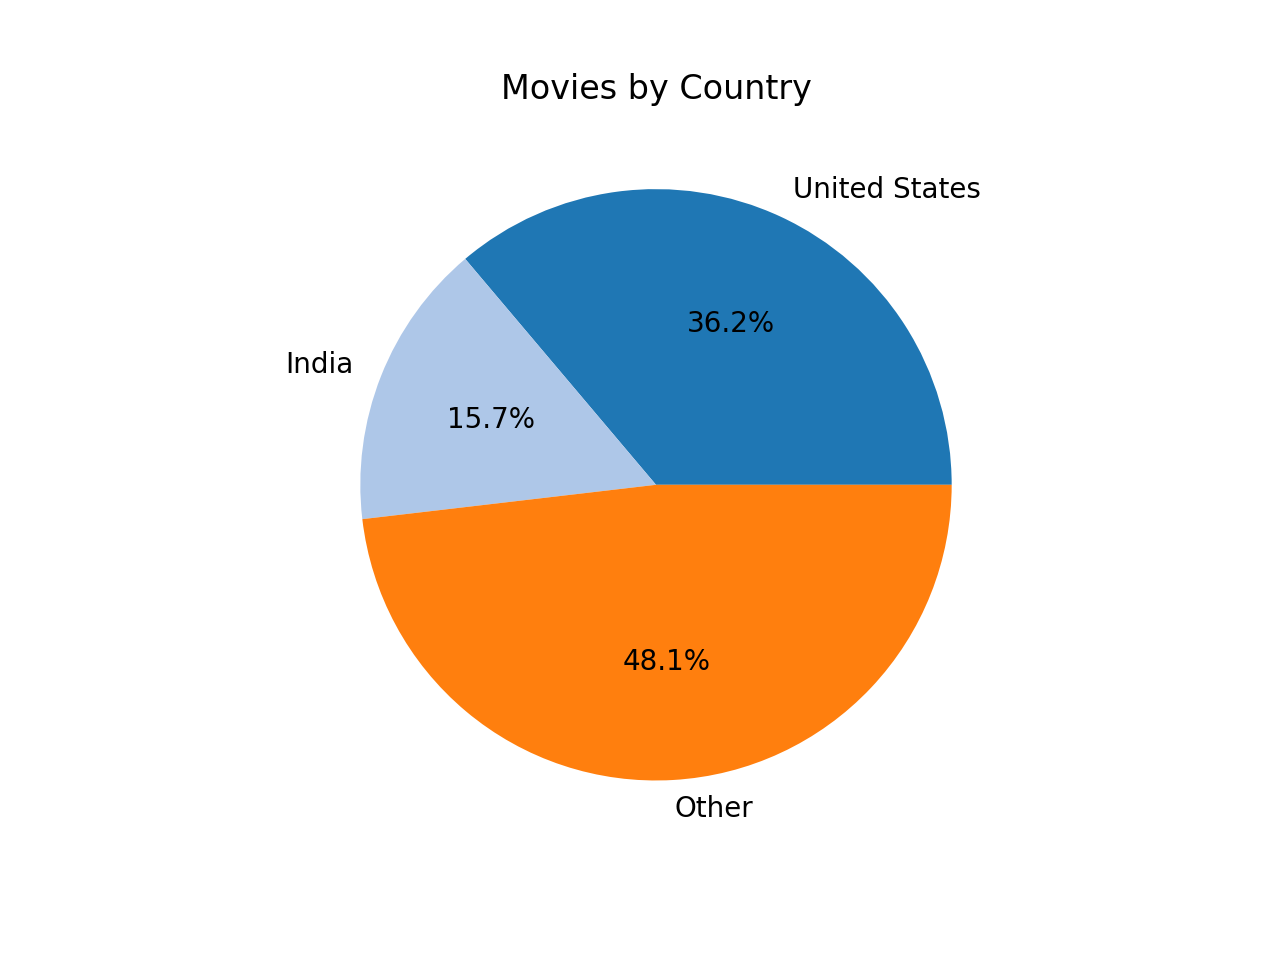

In [43]:
# Calculate country counts for TV shows and movies
tv_shows = df[df['type'] == 'TV Show']
movies = df[df['type'] == 'Movie']

tv_shows_country_counts = tv_shows['country'].value_counts(normalize=True) * 100
movies_country_counts = movies['country'].value_counts(normalize=True) * 100

# Function to plot pie chart with custom label
def plot_pie_chart(country_counts, title):
    threshold = 5
    other_countries = country_counts[country_counts < threshold]
    major_countries = country_counts[country_counts >= threshold]
    major_countries['Other'] = other_countries.sum()

    plt.figure()
    major_countries.plot.pie(autopct=lambda p: '{:.1f}%'.format(p) if p >= threshold else '', label='', colors=plt.cm.tab20.colors)
    plt.title(title)
    plt.ylabel('')
    plt.show()

# Plotting pie charts
plot_pie_chart(tv_shows_country_counts, 'TV Shows by Country')
plot_pie_chart(movies_country_counts, 'Movies by Country')